### a) A drawback of using confidence is that it ignores Pr(B).Why is this a drawback? Explain why lift and conviction do not suffer from this drawback.

Answer a): because when Pr(B) is very high, the confidence might not be that interesting. In other words, the B itself might be a daily item that most people would buy frequently. Therefore, we may need another rule to decide whether it is interesting or whether the result of confidence is meaningful.

Lift do not suffer from this drawback because Lift normalizes confidence by dividing by S(B) (the expected probability of B).If A and B are independent, Lift = 1. If Lift > 1, A and B are positively correlated. This adjustment ensures that common items (high Pr(B)) do not falsely inflate confidence.

Conviction compares the expected and actual occurrence of A without B. If A strongly predicts B, conviction will be high, even if B is common. This measure accounts for both the presence and absence of B, making it more robust.


### b) A measure is symmetrical if measure(A → B) = measure(B → A). Which of the measures presented here are symmetrical? For each measure, please provide either a proof that the measure is symmetrical, or a counterexample that shows the measure is not symmetrical. You have to show every step of the proof in order to get credit.

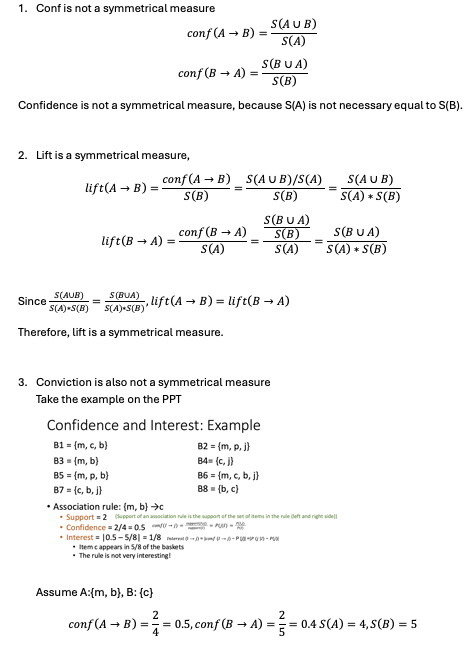

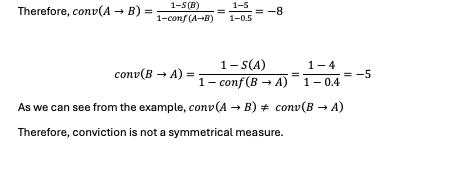

### c) Perfect implications are rules that hold 100% of the time (or equivalently, the associated conditional probability is 1). A measure is desirable if it reaches its maximum achievable value for all perfect implications. This makes it easy to identify the best rules. Which of the above measures have this property? You may ignore 0/0 but not other infinity cases. Also you may find it easy to explain by an example.


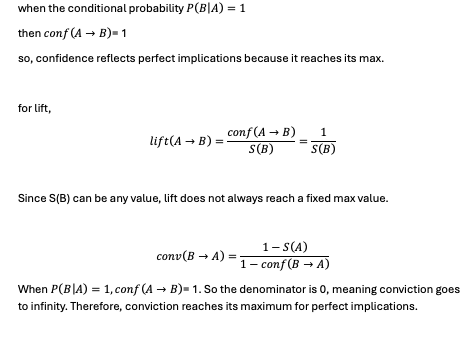

### d) and e)

In [2]:
from itertools import combinations
from collections import defaultdict
import pandas as pd

# Load the dataset from browsing.txt
file_path = "/content/browsing.txt"
with open(file_path, "r") as f:
    transactions = [set(line.strip().split()) for line in f]

# Define minimum support threshold
min_support = 100

# Step 1: Count individual items
item_counts = defaultdict(int)
for transaction in transactions:
    for item in transaction:
        item_counts[item] += 1

# Filter frequent items
frequent_items = set()
for item, count in item_counts.items():
    if count >= min_support:
        frequent_items.add(item)


# Step 2: Generate frequent itemsets of size 2
pair_counts = defaultdict(int)
for transaction in transactions:
    valid_items = transaction.intersection(frequent_items)
    for pair in combinations(valid_items, 2):
        pair_counts[frozenset(pair)] += 1

# Filter frequent pairs
frequent_pairs = {}
for pair, count in pair_counts.items():
    if count >= min_support:
        frequent_pairs[pair] = count

# Step 3: Generate frequent itemsets of size 3
triple_counts = defaultdict(int)
for transaction in transactions:
    valid_items = transaction.intersection(frequent_items)
    for triple in combinations(valid_items, 3):
        if (frozenset([triple[0], triple[1]]) in frequent_pairs and
            frozenset([triple[0], triple[2]]) in frequent_pairs and
            frozenset([triple[1], triple[2]]) in frequent_pairs):
            triple_counts[frozenset(triple)] += 1

# Filter frequent triples
frequent_triples = {}
for triple, count in triple_counts.items():
    if count >= min_support:
        frequent_triples[triple] = count


# Step 4: Compute Association Rules for Pairs (d)
association_rules = []
for pair, support_xy in frequent_pairs.items():
    item_x, item_y = tuple(pair)
    support_x = item_counts[item_x]
    support_y = item_counts[item_y]

    confidence_x_to_y = support_xy / support_x
    confidence_y_to_x = support_xy / support_y

    association_rules.append((item_x, item_y, confidence_x_to_y))
    association_rules.append((item_y, item_x, confidence_y_to_x))

# Sort rules for pairs by confidence (descending), breaking ties lexicographically
association_rules_sorted = sorted(association_rules, key=lambda x: (-x[2], x[0], x[1]))

# Step 5: Compute Association Rules for Triples (e)
triple_rules = []
for triple, support_xyz in frequent_triples.items():
    x, y, z = sorted(triple)  # Ensure consistent ordering

    # Compute confidence for each rule
    support_xy = frequent_pairs.get(frozenset([x, y]), 0)
    support_xz = frequent_pairs.get(frozenset([x, z]), 0)
    support_yz = frequent_pairs.get(frozenset([y, z]), 0)

    if support_xy > 0:
        confidence_xy_to_z = support_xyz / support_xy
        triple_rules.append(((x, y), z, confidence_xy_to_z))

    if support_xz > 0:
        confidence_xz_to_y = support_xyz / support_xz
        triple_rules.append(((x, z), y, confidence_xz_to_y))

    if support_yz > 0:
        confidence_yz_to_x = support_xyz / support_yz
        triple_rules.append(((y, z), x, confidence_yz_to_x))

# Sort rules for triples by confidence (descending), breaking ties lexicographically
triple_rules_sorted = sorted(triple_rules, key=lambda r: (-r[2], r[0][0], r[0][1]))

# Convert association rules for pairs (d) to DataFrame
association_rules_df = pd.DataFrame(association_rules_sorted[:5], columns=['LHS (X)', 'RHS (Y)', 'Confidence'])

# Convert association rules for triples (e) to DataFrame
triple_rules_df = pd.DataFrame(triple_rules_sorted[:5], columns=['LHS (X, Y)', 'RHS (Z)', 'Confidence'])

# Display results

# Print results
print("\nTop 5 Association Rules for Pairs (d)\n", association_rules_df)
print("\nTop 5 Association Rules for Triples (e)\n", triple_rules_df)


# Perform the first sanity check: Count the number of frequent items (L1)
L1_count = len(frequent_items)

# Print the result
print(f"\nSanity Check 1: Number of frequent items after the first pass (L1) = {L1_count}")

# Check if it matches the expected value (647)
if L1_count == 647:
    print("✅ Sanity Check Passed: The number of frequent items is correct!")
else:
    print("❌ Sanity Check Failed: The number of frequent items is incorrect.")


Top 5 Association Rules for Pairs (d)
     LHS (X)   RHS (Y)  Confidence
0  PFE66607  AOS75563    1.000000
1  MOE13579  AOS75563    0.999176
2  SOS23713  AOS75563    0.990654
3  RDJ13710  AOS75563    0.990566
4  FEZ23171  AOS75563    0.986726

Top 5 Association Rules for Triples (e)
              LHS (X, Y)   RHS (Z)  Confidence
0  (DAI23334, ELE92920)  DAI62779         1.0
1  (DAI31081, MOE13579)  AOS75563         1.0
2  (DAI55911, MOE13579)  AOS75563         1.0
3  (DAI62779, FEZ23171)  AOS75563         1.0
4  (DAI75645, MOE13579)  AOS75563         1.0

Sanity Check 1: Number of frequent items after the first pass (L1) = 647
✅ Sanity Check Passed: The number of frequent items is correct!
